Decision Tree

In [43]:
import csv 
import sklearn
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from sklearn import tree
from sklearn.metrics import mean_squared_error as MSE
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from numpy import mean, absolute
import keras

,No,houseAge,nearestDistancetomrt,NoConvenienceStores,latitude,longitude,YHousePriceofUnitArea
0,1,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,5.0,390.56840,5,24.97937,121.54245,43.1


In [49]:
X = all_df.drop("YHousePriceofUnitArea",axis=1)
y = all_df['house_price_PA']

KeyError: 'house_price_PA'

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
model.score(X_train,Y_train)
model.score(X_test,Y_test)
tree_pred = model.predict(X_test)

C:\Users\Asus\anaconda3\envs\mle_tf\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


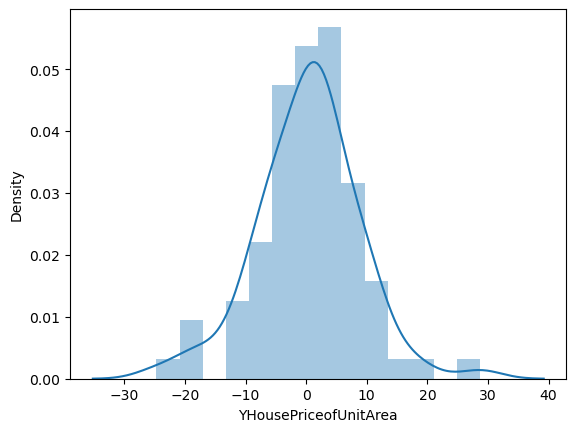

In [51]:
sns.distplot(Y_test-tree_pred)

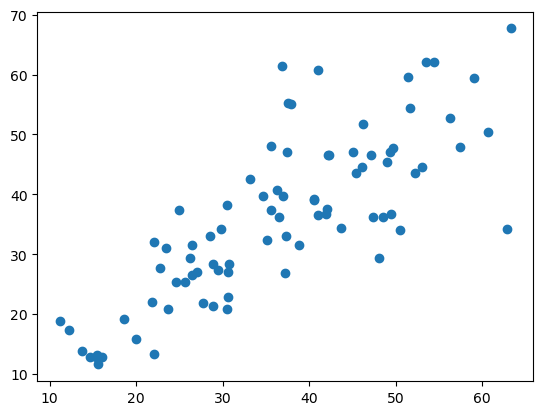

In [52]:
plt.scatter(Y_test,tree_pred)

In [53]:
#parameter tuning for decision tree

param = {
    'splitter': ['best','random'],
    'max_depth': [1,3,5,7,9,11,12],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
    'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5],
    'max_features':["auto","log2","sqrt",None],
    'max_leaf_nodes':[None,10,20,30,40,50,60,70,80,90]
        }

#define grid search
grid_search = GridSearchCV(model, param_grid = param, cv = 5,n_jobs = -1, verbose = 3, scoring = 'neg_mean_squared_error' )
grid_search.fit(X_train,y_train)

#Summarize Results
print('Decision Tree best Params:', grid_search.best_params_)
print('Decision Tree best Score:', grid_search.best_score_)

ValueError: Found input variables with inconsistent numbers of samples: [331, 82]

In [54]:
# After getting the best parameters
reg = DecisionTreeRegressor(criterion = 'squared_error',max_depth = 9, min_samples_leaf = 9,max_features = 'log2',max_leaf_nodes = 60, min_weight_fraction_leaf = 0.1, splitter = 'best')
reg.fit(X_train,Y_train)
DTR_pred = reg.predict(X_test)
print('mean_sqrd_error : {:.2f} '.format(MSE(Y_test,DTR_pred)))

mean_sqrd_error : 43.14 


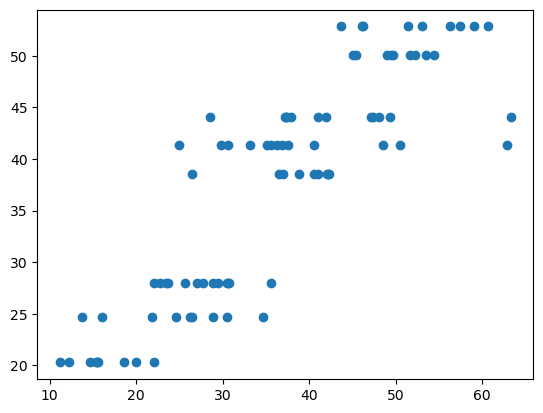

In [55]:
plt.scatter(Y_test,DTR_pred)